## Purpose

Explain the The Exponentially Weighted Moving Average, using real data and visual material.

### Library Import

In [2]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import pandas as pd
import numpy as np

### Functions

In [44]:
def EWMA(df, column, beta = 0.9):
    
    lenght_ewma = df.shape[0]
    
    w_t = np.zeros(lenght_ewma)
    
    theta_t = df[column]
    
    for i in range(1, lenght_ewma):
        w_t[i] = beta*w_t[i-1] + (1-beta)*theta_t[i]
        
    return w_t.tolist()

### Load the data

In [46]:
data_bkp = pd.read_fwf('..\data\FRPARIS.txt'
                       , names = ['month', 'day', 'year', 'temp_f'])

data_all_years = data_bkp.copy()

data_all_years.head()

,month,day,year,temp_f
0,1,1,1995,37.4
1,1,2,1995,35.2
2,1,3,1995,36.0
3,1,4,1995,30.7
4,1,5,1995,27.0


### Filtering the data

In [47]:
data = data_all_years[data_all_years.year == 2019].copy()
data.reset_index(inplace = True)
data.describe()

,index,month,day,year,temp_f
count,365.000000,365.000000,365.000000,365.0,365.000000
mean,8949.000000,4.005479,15.720548,2019.0,52.208219
std,105.510663,2.835213,8.808321,0.0,22.722815
min,8767.000000,1.000000,1.000000,2019.0,-99.000000
25%,8858.000000,1.000000,8.000000,2019.0,46.100000
50%,8949.000000,4.000000,16.000000,2019.0,52.900000
75%,9040.000000,7.000000,23.000000,2019.0,64.100000
max,9131.000000,9.000000,31.000000,2019.0,91.500000


### Temperature correction

In [48]:
display(data[data.temp_f < 0])

# Correction
data[data.temp_f < 0] = 58

display(data[data.temp_f < 0])


,index,month,day,year,temp_f
113,8880,4,24,2019,-99.0
135,8902,5,16,2019,-99.0
136,8903,5,17,2019,-99.0
137,8904,5,18,2019,-99.0
140,8907,5,21,2019,-99.0
141,8908,5,22,2019,-99.0


,index,month,day,year,temp_f


### Get Celsius degress

In [49]:
data['temp_c'] = (data['temp_f'] - 32)*(5/9)

data.describe()

,index,month,day,year,temp_f,temp_c
count,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000
mean,8803.641096,4.879452,16.350685,1986.764384,54.789041,12.660578
std,1137.068718,7.437412,10.308312,249.691247,11.546532,6.414740
min,58.000000,1.000000,1.000000,58.000000,30.300000,-0.944444
25%,8852.000000,1.000000,8.000000,2019.000000,46.600000,8.111111
50%,8949.000000,4.000000,16.000000,2019.000000,53.300000,11.833333
75%,9040.000000,7.000000,24.000000,2019.000000,64.100000,17.833333
max,9131.000000,58.000000,58.000000,2019.000000,91.500000,33.055556


### Adding the day of the year (1-365)

In [50]:
year_day = [i for i in range(1, data.shape[0] + 1)]
data.insert(0, 'year_day', year_day)

In [51]:
data.head()

,year_day,index,month,day,year,temp_f,temp_c
0,1,8767,1,1,2019,46.8,8.222222
1,2,8768,1,2,2019,42.2,5.666667
2,3,8769,1,3,2019,40.5,4.722222
3,4,8770,1,4,2019,39.3,4.055556
4,5,8771,1,5,2019,40.5,4.722222


### Create the date column

In [52]:
data['date'] = pd.date_range("1/1/2019", end="12/31/2019")

In [53]:
data.head()

,year_day,index,month,day,year,temp_f,temp_c,date
0,1,8767,1,1,2019,46.8,8.222222,2019-01-01
1,2,8768,1,2,2019,42.2,5.666667,2019-01-02
2,3,8769,1,3,2019,40.5,4.722222,2019-01-03
3,4,8770,1,4,2019,39.3,4.055556,2019-01-04
4,5,8771,1,5,2019,40.5,4.722222,2019-01-05


### Plot 1

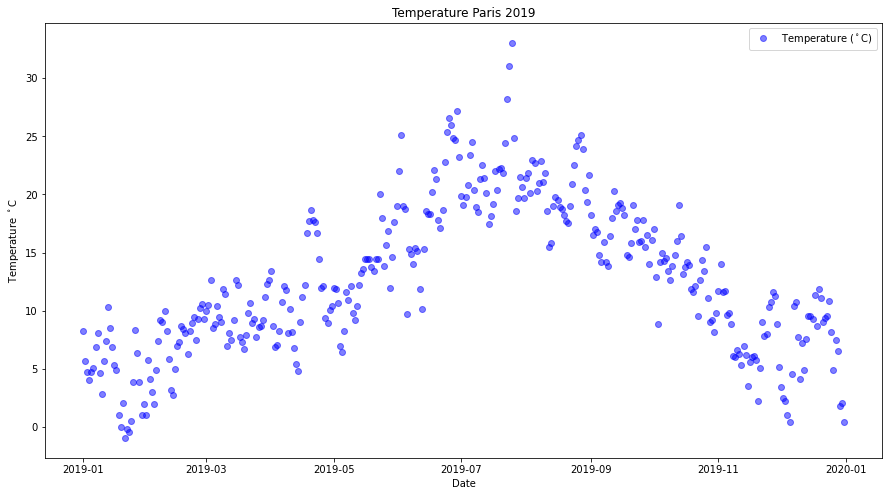

In [54]:
fig1 = plt.figure(figsize = (15, 8))

myFmt = mdates.DateFormatter('%B')


x = data.date

ax.xaxis.set_major_formatter(myFmt)

ax.set_xlim((x.min(), x.max()))


plt.plot(x, data.temp_c, 'o', color = 'b', alpha = 0.5 , label = 'Temperature ($^\circ$C)')
plt.title('Temperature Paris 2019')
plt.legend()
plt.xlabel("Date")
plt.ylabel("Temperature $^\circ$C")


plt.show()

fig1.savefig('../plots/plot_1', dpi = 300)

### Computing the EWA for differents values of $\beta$

In [55]:
data['EWA_0.9'] = EWMA(data, column='temp_c', beta = 0.9)
data['EWA_0.97'] = EWMA(data, column='temp_c', beta = 0.97)
data['EWA_0.5'] = EWMA(data, column='temp_c', beta = 0.5)

### Plot 2

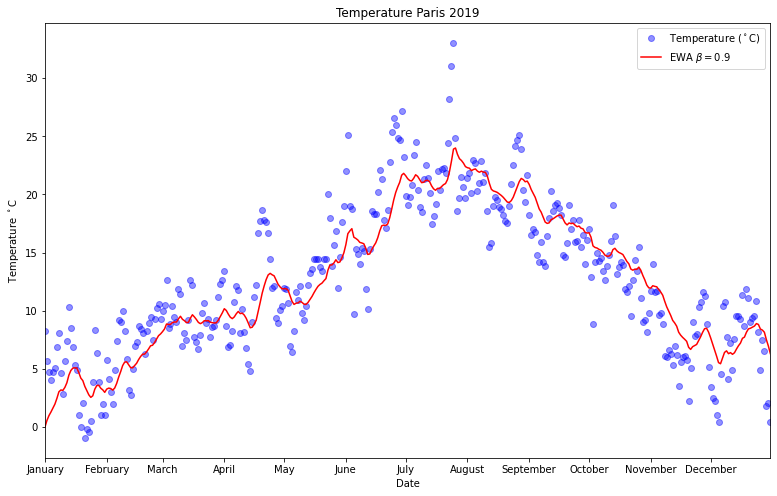

In [56]:
fig2, ax = plt.subplots(figsize=(13, 8))

myFmt = mdates.DateFormatter('%B')
x = data.date
ax.xaxis.set_major_formatter(myFmt)
ax.set_xlim((x.min(), x.max()))


plt.plot(x, data.temp_c, 'o', alpha = 0.43, color = 'b', label = 'Temperature ($^\circ$C)')
plt.plot(x, data['EWA_0.9'], color = 'r', label = r'EWA $\beta = 0.9$')
#plt.plot(x, data['EWA_0.5'], color = 'g', label = r'EWA $\beta = 0.5$')
# plt.plot(x, data['EWA_0.1'], 'o--', color='grey', alpha=0.3, label = r'EWA $\beta = 0.1$')
plt.title('Temperature Paris 2019')
plt.legend()
plt.xlabel("Date")
plt.ylabel("Temperature $^\circ$C")

plt.show()

fig2.savefig('../plots/plot_2', dpi = 300)

### Plot 3

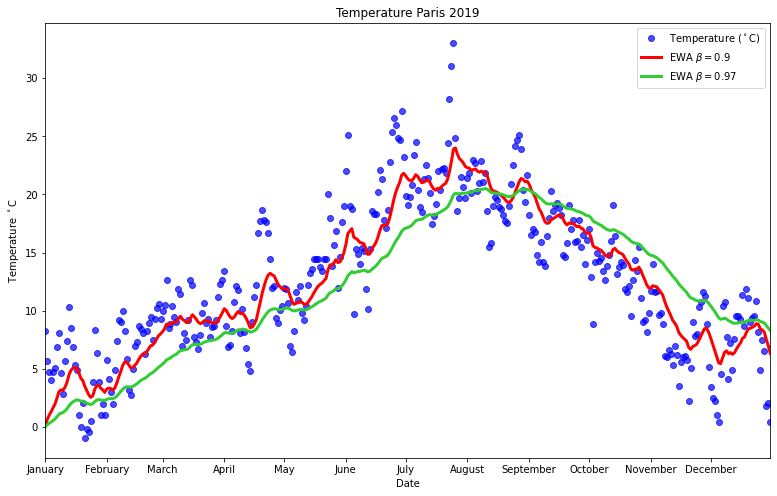

In [57]:
fig3, ax = plt.subplots(figsize=(13, 8))

myFmt = mdates.DateFormatter('%B')
x = data.date
ax.xaxis.set_major_formatter(myFmt)
ax.set_xlim((x.min(), x.max()))


plt.plot(x, data.temp_c, 'o', alpha = 0.7, color = 'b', label = 'Temperature ($^\circ$C)')
plt.plot(x, data['EWA_0.9'], color = 'r', linewidth = 3, label = r'EWA $\beta = 0.9$')
plt.plot(x, data['EWA_0.97'], color = 'limegreen', linewidth = 3, label = r'EWA $\beta = 0.97$')
# plt.plot(x, data['EWA_0.1'], 'o--', color='grey', alpha=0.3, label = r'EWA $\beta = 0.1$')
plt.title('Temperature Paris 2019')
plt.legend()
plt.xlabel("Date")
plt.ylabel("Temperature $^\circ$C")

plt.show()

fig3.savefig('../plots/plot_3', dpi = 300)

### Plot 4

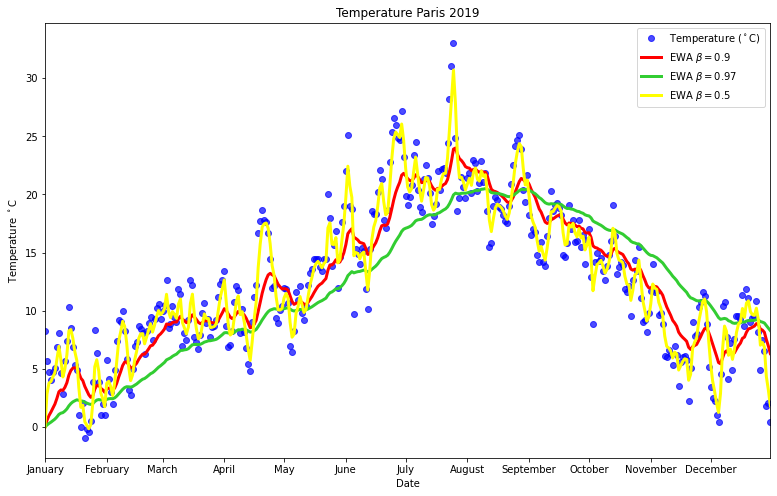

In [58]:
fig4, ax = plt.subplots(figsize=(13, 8))

myFmt = mdates.DateFormatter('%B')
x = data.date
ax.xaxis.set_major_formatter(myFmt)
ax.set_xlim((x.min(), x.max()))


plt.plot(x, data.temp_c, 'o', alpha = 0.7, color = 'b', label = 'Temperature ($^\circ$C)')
plt.plot(x, data['EWA_0.9'], color = 'r', linewidth = 3, label = r'EWA $\beta = 0.9$')
plt.plot(x, data['EWA_0.97'], color = 'limegreen', linewidth = 3, label = r'EWA $\beta = 0.97$')
plt.plot(x, data['EWA_0.5'], color='yellow', linewidth = 3, label = r'EWA $\beta = 0.5$')
plt.title('Temperature Paris 2019')
plt.legend()
plt.xlabel("Date")
plt.ylabel("Temperature $^\circ$C")

plt.show()

fig4.savefig('../plots/plot_4', dpi = 300)

### Compute the Exponential Weights

In [59]:
days_vector = np.array(range(0, 91))
exp_days = np.power(0.9, days_vector)


### Plot 5.1

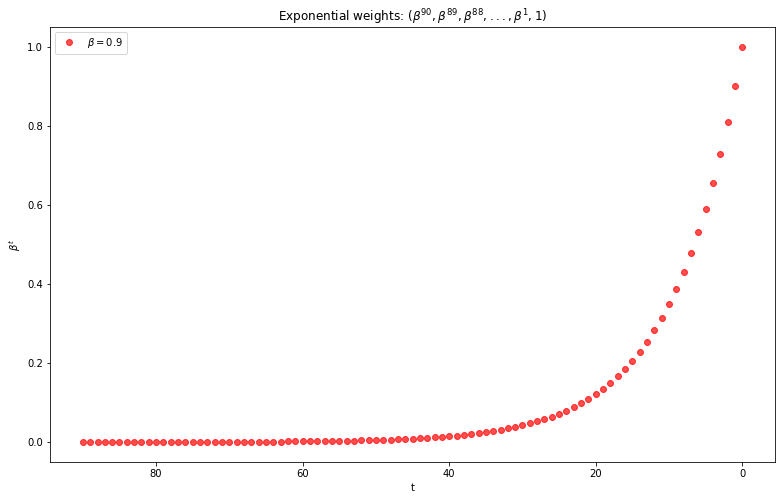

In [60]:
fig5, ax = plt.subplots(figsize=(13, 8))


ax.invert_xaxis()

plt.plot(days_vector, exp_days, 'o', alpha = 0.7, color = 'r', label = r"$\beta= 0.9$")

plt.title(r'Exponential weights: $( \beta^{90}, \beta^{89}, \beta^{88}, ...,\beta^{1}, 1)$')
plt.legend()
plt.xlabel("t")
plt.ylabel(r"$\beta^t$")

plt.show()

fig5.savefig('../plots/plot_5_1', dpi = 300)

### Plot 5.2

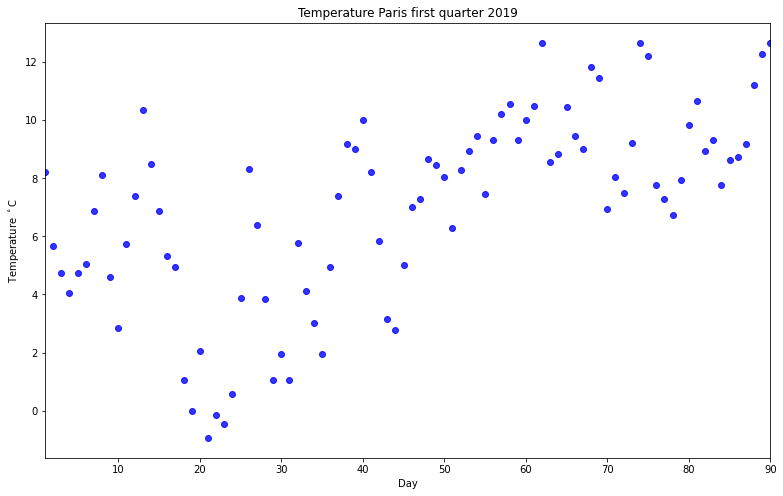

In [61]:
fig52, ax = plt.subplots(figsize=(13, 8))


x = data.year_day[0:90]
ax.set_xlim((x.min(), x.max()))

plt.plot(x, data.temp_c[0:90], 'o', color = 'b', alpha = 0.8 , label = r'$\sigma_t$')
plt.title('Temperature Paris first quarter 2019')
plt.xlabel("Day")
plt.ylabel("Temperature $^\circ$C")


plt.show()

fig52.savefig('../plots/plot_5_2', dpi = 300)

### Plot 5.3

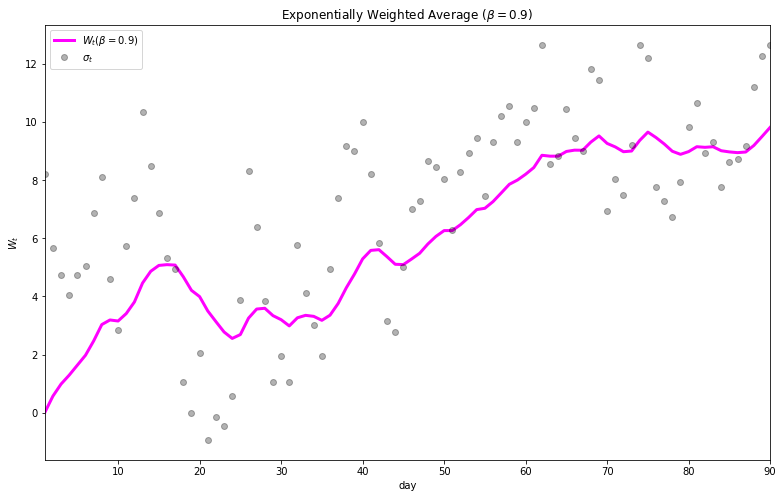

In [62]:

fig53, ax = plt.subplots(figsize=(13, 8))

x = data.year_day[0:90]
ax.set_xlim((x.min(), x.max()))



## EWA

plt.title(r'Exponentially Weighted Average ($\beta = 0.9$)')

plt.plot(x, data['EWA_0.9'][0:90], color = '#FF00FF', linewidth = 3, label = r'$W_t (\beta = 0.9$)')
plt.plot(x, data.temp_c[0:90], 'o', color = 'black', alpha = 0.3 , label = r'$\sigma_t$')

plt.legend()

plt.xlabel('day')
plt.ylabel(r'$W_t$')

plt.show()

fig53.savefig('../plots/plot_5_3', dpi = 300)

### Plot complete

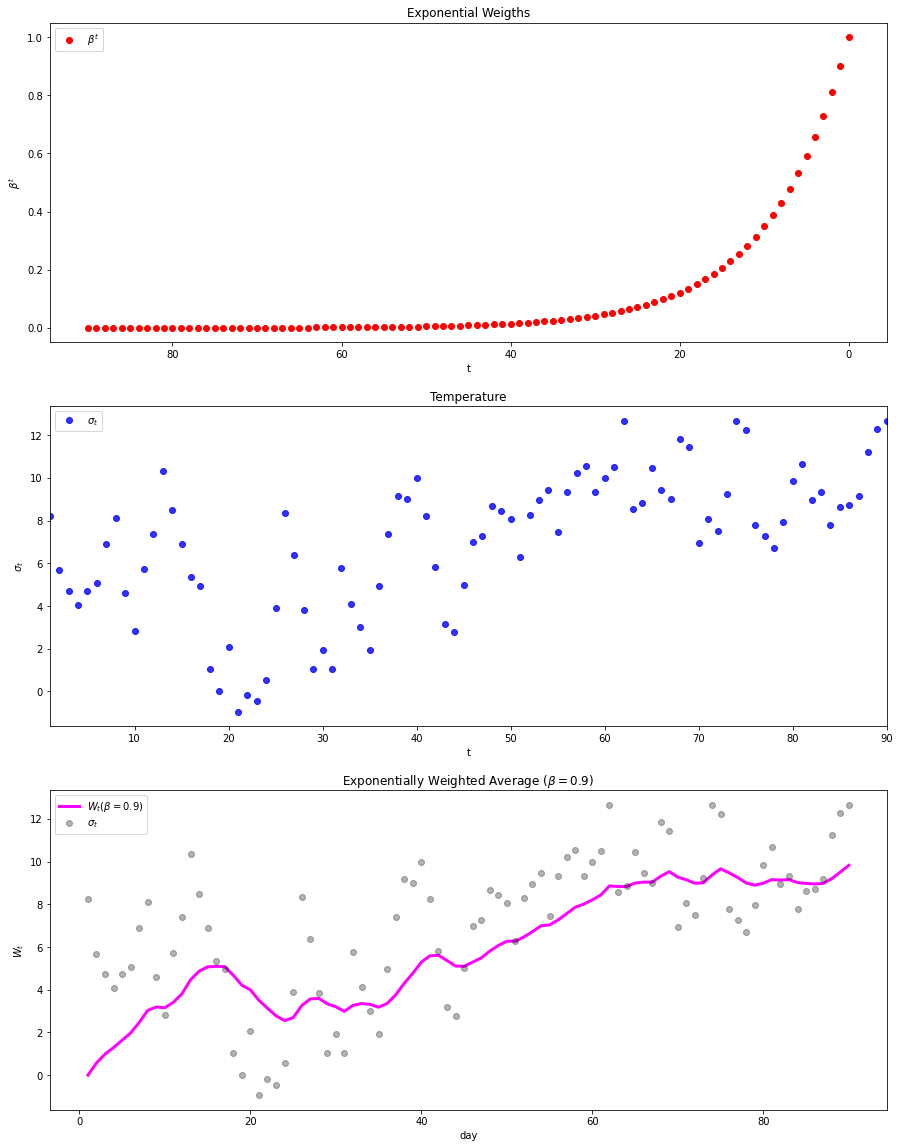

In [63]:
fig5_complete, (ax1, ax2, ax3) = plt.subplots(3,  figsize=(15, 20))


## Exponential Weigths

ax1.title.set_text('Exponential Weigths')


ax1.invert_xaxis()
ax1.plot(days_vector, exp_days, 'o', color = 'r', label = r"$\beta^t$")

ax1.set(xlabel='t', ylabel= r'$\beta^t$')
ax1.legend()


## Temperature

ax2.title.set_text('Temperature')


x = data.year_day[0:90]
ax2.set_xlim((x.min(), x.max()))

ax2.plot(x, data.temp_c[0:90], 'o', color = 'b', alpha = 0.8 , label = r'$\sigma_t$')

ax2.set(xlabel = 't', ylabel= r'$\sigma_t$')
ax2.legend()



## EWA

ax3.title.set_text(r'Exponentially Weighted Average ($\beta = 0.9$)')

ax3.plot(x, data['EWA_0.9'][0:90], color = '#FF00FF', linewidth = 3, label = r'$W_t (\beta = 0.9$)')
ax3.plot(x, data.temp_c[0:90], 'o', color = 'black', alpha = 0.3 , label = r'$\sigma_t$')

ax3.legend()

ax3.set(xlabel='day', ylabel= r'$W_t$')

fig5_complete.savefig('../plots/plot_5_complete', dpi = 300)